### Import Libraries

In [330]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import plotly.express as px
from plotly import graph_objects as go
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sn


### Import Datasets

In [47]:

PUMS_2019_P = pd.read_csv("./Data/ACS PUMS 2019/Dataset/csv_pca/ACS_PUMS_ALAMEDA_P.csv")
PUMS_2019_H = pd.read_csv("./Data/ACS PUMS 2019/Dataset/csv_hca/ACS_PUMS_ALAMEDA_H.csv")

In [386]:
P16 = pd.read_csv("./Data/ACS PUMS 2019/Dataset/csv_pca/ss16pca.csv")

### Initial Exploratory Analysis

In [48]:
PUMS_2019_P.head()

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,CIT,CITWP,COW,DDRS,DEAR,DEYE,DOUT,DPHY,DRAT,DRATX,DREM,ENG,FER,GCL,GCM,GCR,HIMRKS,HINS1,HINS2,HINS3,HINS4,HINS5,HINS6,HINS7,INTP,JWMNP,JWRIP,JWTRNS,LANX,MAR,MARHD,MARHM,MARHT,MARHW,MARHYP,MIG,MIL,MLPA,MLPB,MLPCD,MLPE,MLPFG,MLPH,MLPI,MLPJ,MLPK,NWAB,NWAV,NWLA,NWLK,NWRE,OIP,PAP,RELSHIPP,RETP,SCH,SCHG,SCHL,SEMP,SEX,SSIP,SSP,WAGP,WKHP,WKL,WKWN,WRK,YOEP,ANC,ANC1P,ANC2P,DECADE,DIS,DRIVESP,ESP,ESR,FOD1P,FOD2P,HICOV,HISP,INDP,JWAP,JWDP,LANP,MIGPUMA,MIGSP,MSP,NAICSP,NATIVITY,NOP,OC,OCCP,PAOC,PERNP,PINCP,POBP,POVPIP,POWPUMA,POWSP,PRIVCOV,PUBCOV,QTRBIR,RAC1P,RAC2P,RAC3P,RACAIAN,RACASN,RACBLK,RACNH,RACNUM,RACPI,RACSOR,RACWHT,RC,SCIENGP,SCIENGRLP,SFN,SFR,SOCP,VPS,WAOB,FAGEP,FANCP,FCITP,FCITWP,FCOWP,FDDRSP,FDEARP,FDEYEP,FDISP,FDOUTP,FDPHYP,FDRATP,FDRATXP,FDREMP,FENGP,FESRP,FFERP,FFODP,FGCLP,FGCMP,FGCRP,FHICOVP,FHIMRKSP,FHINS1P,FHINS2P,FHINS3C,FHINS3P,FHINS4C,FHINS4P,FHINS5C,FHINS5P,FHINS6P,FHINS7P,FHISP,FINDP,FINTP,FJWDP,FJWMNP,FJWRIP,FJWTRNSP,FLANP,FLANXP,FMARP,FMARHDP,FMARHMP,FMARHTP,FMARHWP,FMARHYP,FMIGP,FMIGSP,FMILPP,FMILSP,FOCCP,FOIP,FPAP,FPERNP,FPINCP,FPOBP,FPOWSP,FPRIVCOVP,FPUBCOVP,FRACP,FRELSHIPP,FRETP,FSCHGP,FSCHLP,FSCHP,FSEMP,FSEXP,FSSIP,FSSP,FWAGP,FWKHP,FWKLP,FWKWNP,FWRKP,FYOEP,PWGTP1,PWGTP2,PWGTP3,PWGTP4,PWGTP5,PWGTP6,PWGTP7,PWGTP8,PWGTP9,PWGTP10,PWGTP11,PWGTP12,PWGTP13,PWGTP14,PWGTP15,PWGTP16,PWGTP17,PWGTP18,PWGTP19,PWGTP20,PWGTP21,PWGTP22,PWGTP23,PWGTP24,PWGTP25,PWGTP26,PWGTP27,PWGTP28,PWGTP29,PWGTP30,PWGTP31,PWGTP32,PWGTP33,PWGTP34,PWGTP35,PWGTP36,PWGTP37,PWGTP38,PWGTP39,PWGTP40,PWGTP41,PWGTP42,PWGTP43,PWGTP44,PWGTP45,PWGTP46,PWGTP47,PWGTP48,PWGTP49,PWGTP50,PWGTP51,PWGTP52,PWGTP53,PWGTP54,PWGTP55,PWGTP56,PWGTP57,PWGTP58,PWGTP59,PWGTP60,PWGTP61,PWGTP62,PWGTP63,PWGTP64,PWGTP65,PWGTP66,PWGTP67,PWGTP68,PWGTP69,PWGTP70,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,P,2019GQ0000081,9,1,102,4,6,1010145,13,70,1,NaN,NaN,1.0,2,2,1.0,1.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,0,2,2,1,1,2,2,2,0.0,NaN,NaN,NaN,2.0,5,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.0,3.0,0.0,0.0,37,0.0,1.0,NaN,16.0,0.0,2,0.0,0.0,0.0,NaN,3.0,NaN,NaN,NaN,1,902,999,NaN,1,NaN,NaN,6.0,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1,NaN,NaN,NaN,NaN,0.0,0.0,6,NaN,NaN,NaN,2,1,2,2,2,2,0,0,1,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,11,0,11,12,11,22,11,12,2,24,0,2,13,12,22,22,2,13,25,12,11,1,11,14,12,22,11,13,0,22,1,2,13,11,24,24,0,13,24,12,11,0,11,13,11,24,13,13,2,24,0,2,13,13,24,24,2,13,24,13,11,2,13,11,12,24,11,11,0,22,0,0,13,11,22,23,2,13,22
1,P,2019GQ0000219,9,1,103,4,6,1010145,4,34,4,1995.0,2.0,2.0,2,2,2.0,2.0,NaN,NaN,2.0,2.0,NaN,2.0,NaN,NaN,2,2,1,2,2,2,2,2,0.0,10.0,NaN,12.0,1.0,5,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,2.0,2.0,3.0,0.0,0.0,38,0.0,1.0,NaN,22.0,0.0,1,0.0,0.0,17000.0,8.0,1.0,1.0,1.0,1990.0,1,785,999,6.0,2,NaN,NaN,1.0,4801.0,NaN,1,1,9160.0,87.0,46.0,1960.0,1.0,362.0,6.0,8131,2,NaN,NaN,2040.0,NaN,17000.0,17000.0,247,128.0,100.0,6.0,1,2,2,6,57,9,0,1,0,0,1,0,0,0,NaN,2.0,2.0,NaN,NaN,212011,NaN,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,9,7,0,4,7,0,0,5,3,8,6,4,4,4,8,5,3,0,4,7,0,0,8,4,0,9,9,4,4,0,4,3,3,4,0,4,4,8,4,8,0,0,9,4,0,7,7,6,3,0,4,4,5,4,0,4,3,8,4,0,8,7,0,3,7,0,0,4,6,7,3,4,4,4,8,4,4,0,4
2,P,2019GQ0000925,9,1,104,4,6,1010145,142,81,1,NaN,NaN,2.0,2,2,2.0,2.0,NaN,2.0,2.0,NaN,NaN,2.0,NaN,NaN,0,2,2,1,1,2,2,2,0.0,NaN,NaN,NaN,2.0,2,2.0,2.0,1.0,2.0,1986.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,5.0,2.0,2.0,3.0,0.0,0.0,38,0.0,1.0,NaN,16.0,0.0,1,0.0,0.0,0.0,NaN,3.0,NaN,2.0,NaN,1,902,999,NaN,2,NaN,NaN,6.0,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1,NaN,NaN,NaN,NaN,0.0,0.0,26,0.0,NaN,NaN,2,1,1,2,2,2,0,0,1,0,1,0,0,0,NaN,NaN,NaN,

In [49]:
PUMS_2019_H.head()

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJHSG,ADJINC,WGTP,NP,TYPE,ACCESS,ACR,AGS,BATH,BDSP,BLD,BROADBND,COMPOTHX,CONP,DIALUP,ELEFP,ELEP,FS,FULFP,FULP,GASFP,GASP,HFL,HISPEED,HOTWAT,INSP,LAPTOP,MHP,MRGI,MRGP,MRGT,MRGX,OTHSVCEX,REFR,RMSP,RNTM,RNTP,RWAT,RWATPR,SATELLITE,SINK,SMARTPHONE,SMP,STOV,TABLET,TEL,TEN,VACS,VALP,VEH,WATFP,WATP,YBL,CPLT,FES,FINCP,FPARC,GRNTP,GRPIP,HHL,HHLANP,HHT,HHT2,HINCP,HUGCL,HUPAC,HUPAOC,HUPARC,KIT,LNGI,MULTG,MV,NOC,NPF,NPP,NR,NRC,OCPIP,PARTNER,PLM,PLMPRP,PSF,R18,R60,R65,RESMODE,SMOCP,SMX,SRNT,SVAL,TAXAMT,WIF,WKEXREL,WORKSTAT,FACCESSP,FACRP,FAGSP,FBATHP,FBDSP,FBLDP,FBROADBNDP,FCOMPOTHXP,FCONP,FDIALUPP,FELEP,FFINCP,FFSP,FFULP,FGASP,FGRNTP,FHFLP,FHINCP,FHISPEEDP,FHOTWATP,FINSP,FKITP,FLAPTOPP,FMHP,FMRGIP,FMRGP,FMRGTP,FMRGXP,FMVP,FOTHSVCEXP,FPLMP,FPLMPRP,FREFRP,FRMSP,FRNTMP,FRNTP,FRWATP,FRWATPRP,FSATELLITEP,FSINKP,FSMARTPHONP,FSMOCP,FSMP,FSMXHP,FSMXSP,FSTOVP,FTABLETP,FTAXP,FTELP,FTENP,FVACSP,FVALP,FVEHP,FWATP,FYBLP,WGTP1,WGTP2,WGTP3,WGTP4,WGTP5,WGTP6,WGTP7,WGTP8,WGTP9,WGTP10,WGTP11,WGTP12,WGTP13,WGTP14,WGTP15,WGTP16,WGTP17,WGTP18,WGTP19,WGTP20,WGTP21,WGTP22,WGTP23,WGTP24,WGTP25,WGTP26,WGTP27,WGTP28,WGTP29,WGTP30,WGTP31,WGTP32,WGTP33,WGTP34,WGTP35,WGTP36,WGTP37,WGTP38,WGTP39,WGTP40,WGTP41,WGTP42,WGTP43,WGTP44,WGTP45,WGTP46,WGTP47,WGTP48,WGTP49,WGTP50,WGTP51,WGTP52,WGTP53,WGTP54,WGTP55,WGTP56,WGTP57,WGTP58,WGTP59,WGTP60,WGTP61,WGTP62,WGTP63,WGTP64,WGTP65,WGTP66,WGTP67,WGTP68,WGTP69,WGTP70,WGTP71,WGTP72,WGTP73,WGTP74,WGTP75,WGTP76,WGTP77,WGTP78,WGTP79,WGTP80
0,H,2019GQ0000081,9,102,4,6,1000000,1010145,0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,H,2019GQ0000219,9,103,4,6,1000000,1010145,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,H,2019GQ0000925,9,104,4,6,1000000,1010145,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,H,2019GQ0001389,9,103,4,6,1000000,1010145,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [50]:
PUMS_2019_P.shape

(6147, 288)

In [63]:
PUMS_2019_H.shape

(2831, 236)

### Indicators

#### Indicator 39

In [61]:
PUMS_2019_H['Rent_Burden'] = np.where(
    PUMS_2019_H['GRPIP'] < 30, 0, np.where(
    np.isnan(PUMS_2019_H['GRPIP']), np.nan, 1))

In [51]:
 np.nan

nan

### Visualizations

#### Bar Chart Income vs Ethnicty and Gender (2018 vs 2019)

In [86]:
P19P_Bar = PUMS_2019_P[["WAGP", "RAC1P", "ESR", "SEX"]]
#Refactor Races
racesExcluded = [3,4,5,7,9]
P19P_Bar = P19P_Bar.loc[~(P19P_Bar["RAC1P"].isin(racesExcluded))]
P19P_Bar.RAC1P = P19P_Bar.RAC1P.replace({6: "Asian", 1: "White", 2: "African American", 8: "Other"})
#Want people in the work force, ESR = 6 means not in work force and ESR = Null means underage
P19P_Bar = P19P_Bar.loc[(P19P_Bar["ESR"].notnull()) & (P19P_Bar["ESR"] != 6)]
P19P_Bar.head()

,WAGP,RAC1P,ESR,SEX
1,17000.0,Asian,1.0,1
12,4000.0,White,1.0,1
13,20000.0,Asian,1.0,2
14,8600.0,African American,1.0,1
15,10000.0,White,1.0,2


In [387]:
P16P_Bar = P16[["WAGP", "RAC1P", "ESR", "SEX"]]
#Refactor Races
racesExcluded = [3,4,5,7,9]
P16P_Bar = P16P_Bar.loc[~(P16P_Bar["RAC1P"].isin(racesExcluded))]
P16P_Bar.RAC1P = P16P_Bar.RAC1P.replace({6: "Asian", 1: "White", 2: "African American", 8: "Other"})
#Want people in the work force, ESR = 6 means not in work force and ESR = Null means underage
P16P_Bar = P16P_Bar.loc[(P16P_Bar["ESR"].notnull()) & (P16P_Bar["ESR"] != 6)]
P16P_Bar.head()

,WAGP,RAC1P,ESR,SEX
3,15700.0,White,1.0,1
5,94000.0,White,1.0,2
6,110000.0,Asian,1.0,1
7,46000.0,White,1.0,1
9,52000.0,Other,1.0,1


In [ ]:
P16

In [225]:
#redo with HA code
grouped_single = pd.DataFrame(P19P_Bar.groupby(['RAC1P', 'SEX'], as_index=False).agg({'WAGP': ['mean']}).as_matrix())
grouped_single = grouped_single.rename(columns={0:"Ethnicity", 1:"Sex", 2: "Wages"})
grouped_single

C:\Users\lalin90\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



,Ethnicity,Sex,Wages
0,African American,1,60102.9
1,African American,2,44648.7
2,Asian,1,77293.5
3,Asian,2,63990.1
4,Other,1,43372.1
5,Other,2,37428
6,White,1,106510
7,White,2,75253.4


In [388]:
#redo with HA code
grouped_single16 = pd.DataFrame(P16P_Bar.groupby(['RAC1P', 'SEX'], as_index=False).agg({'WAGP': ['mean']}).as_matrix())
grouped_single16 = grouped_single.rename(columns={0:"Ethnicity", 1:"Sex", 2: "Wages"})
grouped_single16

C:\Users\lalin90\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



,Ethnicity,Sex,Wages
0,African American,1,60102.9
1,African American,2,44648.7
2,Asian,1,77293.5
3,Asian,2,63990.1
4,Other,1,43372.1
5,Other,2,37428
6,White,1,106510
7,White,2,75253.4


In [154]:
grouped_single.loc[grouped_single["Sex"] ==1, "Wages"]

0    60102.9
2    77293.5
4    43372.1
6     106510
Name: Wages, dtype: object

In [221]:
grouped_single16.loc[grouped_single["Sex"] ==1, "Wages"]

0    60102.9
2    77293.5
4    43372.1
6     106510
Name: Wages, dtype: object

In [175]:
grouped_single.loc[grouped_single["Sex"] ==0, "Wages"]

Series([], Name: Wages, dtype: object)

In [227]:
fig1 = go.Figure(
    data = [
        go.Bar(
            name="Male 2018",
            x=grouped_single.Ethnicity.unique(),
            y=grouped_single.loc[grouped_single["Sex"] ==1, "Wages"],
            offsetgroup=0,
        ),
        go.Bar(
            name="Female 2018",
            x=grouped_single.Ethnicity.unique(),
            y=grouped_single.loc[grouped_single["Sex"] ==2, "Wages"],
            offsetgroup=0,
            #base=grouped_single.loc[grouped_single["Sex"] ==1, "Wages"],
        ),
        go.Bar(
            name="Male 2019",
            x=grouped_single16.Ethnicity.unique(),
            y=grouped_single16.loc[grouped_single16["Sex"] ==1, "Wages"],
            offsetgroup=1,
        ),
        go.Bar(
            name="Female 2019",
            x=grouped_single16.Ethnicity.unique(),
            y=grouped_single16.loc[grouped_single16["Sex"] ==2, "Wages"],
            offsetgroup=1,
            base=grouped_single16.loc[grouped_single16["Sex"] ==1, "Wages"],
        )
    ],
    layout=go.Layout(
        #barmode='stack',
        title="Bar Chart Income vs Ethnicty and Gender (2018 vs 2019)",
        yaxis_title="Average Yearly Salary",
        xaxis_title="Ethnicity"
    )
)

In [228]:
fig1.show()

In [120]:
LG = PUMS_2019_P[["AGEP", "JWMNP", "SEX", "WAGP", "FER", "PWGTP", "POVPIP"]]

In [123]:
LG.to_csv('LG.csv', index=False)

#### Linear Regression

In [369]:
LG = LG[LG["AGEP"]>=16]

In [370]:
X = LG.copy()

In [371]:
# drop rows where y values are empty
X = X[X['POVPIP'].notna()]

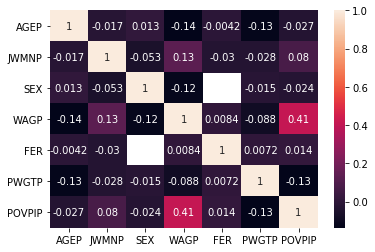

In [372]:
corrMatrix = X.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [373]:
X = X[["JWMNP", "WAGP", "FER", "PWGTP", "POVPIP"]]
X = X.dropna()

In [374]:
y = X.pop('POVPIP')


In [375]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=9)

In [376]:
X_test.head()

,JWMNP,WAGP,FER,PWGTP
3480,10.0,1000.0,2.0,70
3036,7.0,89000.0,2.0,101
5383,5.0,8000.0,2.0,272
2194,45.0,225000.0,1.0,59
4576,20.0,60000.0,2.0,308


In [377]:
# fill in missing training values with mean
X_train_means = X_train.mean(axis=0)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train_means)

In [378]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [379]:
y_pred = lin_reg.predict(X_test)

In [380]:
metrics.mean_squared_error(y_test,y_pred)

17864.304451104275

In [381]:
lin_reg.intercept_

380.0556571880251

In [382]:
lin_reg.coef_

array([-6.65435268e-02,  1.09927845e-03, -1.63626836e+01, -1.82193470e-01])

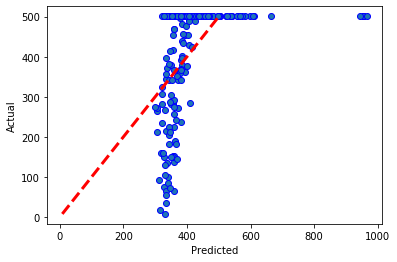

In [383]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [384]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 101.68431695911744
MSE is 17864.304451104275
R2 score is 0.05727655525497677
